# Ödev 1

In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Görev 1:

#### 1. Online Retail II excelindeki 2010-2011 verisini okuyunuz. Oluşturduğunuz dataframe’in kopyasını oluşturunuz.

In [3]:
#df_ = pd.read_excel("~/Desktop/VBO-Bootcamp-Dersler/3.Hafta/Ders-Oncesi-Notlar/online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [4]:
df = df_.copy() 

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


#### 2. Veri setinin betimsel istatistiklerini inceleyiniz.

In [6]:
df.shape

(541910, 8)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.00000,9.55223,218.08096,-80995.00000,1.00000,3.00000,10.00000,80995.00000
Price,541910.00000,4.61114,96.75977,-11062.06000,1.25000,2.08000,4.13000,38970.00000
Customer ID,406830.00000,15287.68416,1713.60307,12346.00000,13953.00000,15152.00000,16791.00000,18287.00000


#### 3. Veri setinde eksik gözlem var mı? Varsa hangi değişkende kaç tane eksik gözlem vardır?

In [8]:
df.isnull().sum() # Eksik gözlem verisi sayısı

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(406830, 8)

In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


#### 5. Eşsiz ürün sayısı kaçtır?

In [12]:
df["Description"].nunique()

3896

#### 6. Hangi üründen kaçar tane vardır?

In [13]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Description, dtype: int64

#### 7. En çok sipariş edilen 5 ürünü çoktan aza doğru sıralayınız.

In [14]:
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


#### 8. Faturalardaki ‘C’ iptal edilen işlemleri göstermektedir. İptal edilen işlemleri veri setinden çıkartınız.

In [15]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [16]:
df.shape

(397925, 8)

#### 9. Fatura başına elde edilen toplam kazancı ifade eden ‘TotalPrice’ adında bir değişken oluşturunuz.

In [17]:
df["TotalPrice"] = df["Quantity"]*df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,20.34000


## Görev 2:

#### Recency, Frequency ve Monetary tanımlarını yapınız.

In [18]:
# Recency (yenilik): Müşterinin son satın almasından bugüne kadar geçen süre
# Frequency (Sıklık): Toplam satın alma sayısı.
# Monetary (Parasal Değer): Müşterinin yaptığı toplam harcama.

#### Müşteri özelinde Recency, Frequency ve Monetary metriklerini groupby, agg ve lambda ile hesaplayınız.

In [19]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [20]:
today_date = dt.datetime(2011, 12, 11) # max InvoiceDate 

In [21]:
rfm = df.groupby("Customer ID").agg({"InvoiceDate": lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     "Invoice": lambda Invoice: Invoice.nunique(),
                                     "TotalPrice": lambda TotalPrice: TotalPrice.sum()})
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00000,326,1,77183.60000
12347.00000,3,7,4310.00000
12348.00000,76,4,1797.24000
12349.00000,19,1,1757.55000
12350.00000,311,1,334.40000


#### Oluşturduğunuz metriklerin isimlerini recency, frequency ve monetary olarak değiştiriniz.

In [22]:
rfm.shape

(4339, 3)

In [23]:
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.00000,326,1,77183.60000
12347.00000,3,7,4310.00000
12348.00000,76,4,1797.24000
12349.00000,19,1,1757.55000
12350.00000,311,1,334.40000


In [24]:
rfm = rfm[rfm["Monetary" ]> 0]
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.00000,326,1,77183.60000
12347.00000,3,7,4310.00000
12348.00000,76,4,1797.24000
12349.00000,19,1,1757.55000
12350.00000,311,1,334.40000


In [25]:
(rfm["Monetary"] < 0).any()

False

## Görev 3:

#### ▪ Recency, Frequency ve Monetary metriklerini qcut yardımı ile 1-5 arasında skorlara çeviriniz.

In [26]:
rfm["recency_score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
rfm.head()

,Recency,Frequency,Monetary,recency_score
Customer ID,,,,
12346.00000,326,1,77183.60000,1
12347.00000,3,7,4310.00000,5
12348.00000,76,4,1797.24000,2
12349.00000,19,1,1757.55000,4
12350.00000,311,1,334.40000,1


In [27]:
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score
Customer ID,,,,,
12346.00000,326,1,77183.60000,1,1
12347.00000,3,7,4310.00000,5,5
12348.00000,76,4,1797.24000,2,4
12349.00000,19,1,1757.55000,4,1
12350.00000,311,1,334.40000,1,1


In [28]:
rfm["monetary_score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
12346.00000,326,1,77183.60000,1,1,5
12347.00000,3,7,4310.00000,5,5,5
12348.00000,76,4,1797.24000,2,4,4
12349.00000,19,1,1757.55000,4,1,4
12350.00000,311,1,334.40000,1,1,2


#### ▪ Oluşan 2 farklı değişkenin değerini tek bir değişken olarak ifade ediniz ve RFM_SCORE olarak kaydediniz.

In [29]:
rfm["RFM_SCORE"] = rfm["recency_score"].astype(str)+rfm["frequency_score"].astype(str)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.00000,326,1,77183.60000,1,1,5,11
12347.00000,3,7,4310.00000,5,5,5,55
12348.00000,76,4,1797.24000,2,4,4,24
12349.00000,19,1,1757.55000,4,1,4,41
12350.00000,311,1,334.40000,1,1,2,11


## Görev 4:

#### ▪ Oluşturulan RFM skorların daha açıklanabilir olması için segment tanımlamaları yapınız.
#### ▪ Aşağıdaki seg_map yardımı ile skorları segmentlere çeviriniz.

In [30]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [31]:
rfm["segment"] = rfm["RFM_SCORE"].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.00000,326,1,77183.60000,1,1,5,11,hibernating
12347.00000,3,7,4310.00000,5,5,5,55,champions
12348.00000,76,4,1797.24000,2,4,4,24,at_Risk
12349.00000,19,1,1757.55000,4,1,4,41,promising
12350.00000,311,1,334.40000,1,1,2,11,hibernating


## Görev 5:

#### Önemli bulduğunuz 3 segmenti seçiniz. Bu üç segmenti;
#### - Hem aksiyon kararları açısından,
#### - Hem de segmentlerin yapısı açısından (ortalama RFM değerleri) yorumlayınız.


In [32]:
rfm_need_attention = rfm[rfm["segment"] == "need_attention"]

In [33]:
rfm_need_attention[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "count"])

Recency       Frequency        Monetary      
                   mean count      mean count      mean count
segment                                                      
need_attention 52.42781   187   2.32620   187 897.62786   187

In [34]:
rfm_at_Risk = rfm[rfm["segment"] == "at_Risk"]
rfm_at_Risk[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "count"])

Recency       Frequency         Monetary      
             mean count      mean count       mean count
segment                                                 
at_Risk 153.78583   593   2.87858   593 1084.53530   593

In [35]:
rfm_champions = rfm[rfm["segment"] == "champions"]
rfm_champions[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "count"])

Recency       Frequency         Monetary      
             mean count      mean count       mean count
segment                                                 
champions 6.36177   633  12.41706   633 6857.96392   633

## K-Means

In [36]:
rfm_Kmeans = rfm[['Recency', 'Frequency']]

In [37]:
sc = MinMaxScaler()
rfm_Kmeans = sc.fit_transform(rfm_Kmeans)

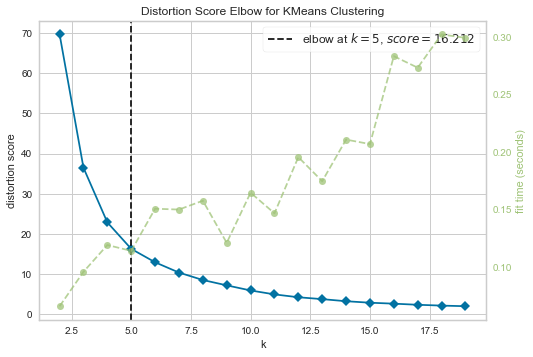

In [38]:
# Daha otomatik bir yol:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(rfm_Kmeans)
elbow.show();

In [39]:
elbow.elbow_value_

5

In [40]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(rfm_Kmeans)  # elbowa göre yaptırıyoz.
kumeler = kmeans.labels_

In [41]:
rfm_Kmeans = pd.DataFrame(rfm_Kmeans)

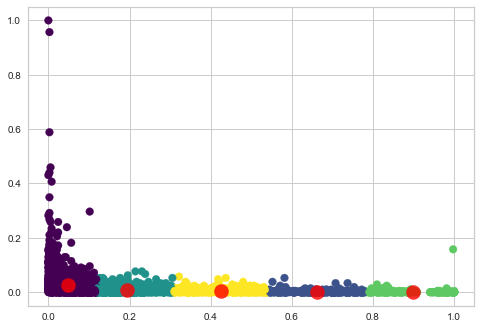

In [42]:
merkezler = kmeans.cluster_centers_

plt.scatter(rfm_Kmeans.iloc[:, 0],
            rfm_Kmeans.iloc[:, 1],
            c=kumeler,
            s=60,
            cmap="viridis")

plt.scatter(merkezler[:, 0],
            merkezler[:, 1],
            c="red",
            s=200,
            alpha=0.8)
plt.show()

In [43]:
rfm_ = rfm.copy() 

In [47]:
pd.DataFrame({"CustomerID": rfm_.index, "segment":rfm_.segment, "Kumeler": kumeler}).head()

,CustomerID,segment,Kumeler
Customer ID,,,
12346.00000,12346.00000,hibernating,3
12347.00000,12347.00000,champions,0
12348.00000,12348.00000,at_Risk,2
12349.00000,12349.00000,promising,0
12350.00000,12350.00000,hibernating,3


In [48]:
rfm_["cluster_no"] = kumeler

In [49]:
rfm_["cluster_no"] = rfm_["cluster_no"] + 1

In [50]:
rfm_.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment,cluster_no
Customer ID,,,,,,,,,
12346.00000,326,1,77183.60000,1,1,5,11,hibernating,4
12347.00000,3,7,4310.00000,5,5,5,55,champions,1
12348.00000,76,4,1797.24000,2,4,4,24,at_Risk,3
12349.00000,19,1,1757.55000,4,1,4,41,promising,1
12350.00000,311,1,334.40000,1,1,2,11,hibernating,4


In [69]:
cross_table = pd.crosstab(rfm_['cluster_no'], rfm_['segment'])
cross_table

segment,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising
cluster_no,,,,,,,,,,
1,99,0,0,633,0,636,67,42,484,94
2,0,98,5,0,338,0,0,0,0,0
3,253,235,36,0,210,183,120,0,0,0
4,0,30,3,0,260,0,0,0,0,0
5,0,230,19,0,263,0,0,0,0,0


#### Cluster sayısını arttırırsak RFM'e daha çok benzer mi?

In [90]:
kmeans = KMeans(n_clusters=8).fit(rfm_Kmeans)  # elbowa göre yaptırıyoz.
kumeler = kmeans.labels_

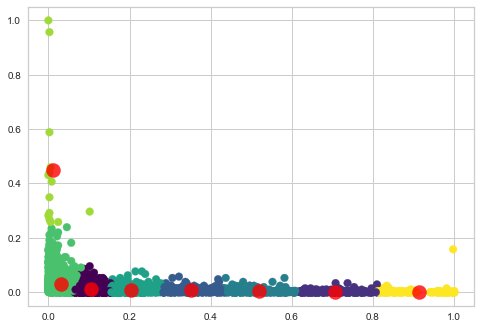

In [91]:
merkezler = kmeans.cluster_centers_

plt.scatter(rfm_Kmeans.iloc[:, 0],
            rfm_Kmeans.iloc[:, 1],
            c=kumeler,
            s=60,
            cmap="viridis")

plt.scatter(merkezler[:, 0],
            merkezler[:, 1],
            c="red",
            s=200,
            alpha=0.8)
plt.show()

In [92]:
rfm_ = rfm.copy() 

In [93]:
rfm_["cluster_no"] = kumeler

In [94]:
rfm_["cluster_no"] = rfm_["cluster_no"] + 1

In [95]:
cross_table = pd.crosstab(rfm_['cluster_no'], rfm_['segment'])
cross_table

segment,about_to_sleep,at_Risk,cant_loose,champions,hibernating,loyal_customers,need_attention,new_customers,potential_loyalists,promising
cluster_no,,,,,,,,,,
1,224,0,0,0,0,371,122,0,126,42
2,0,65,3,0,281,0,0,0,0,0
3,0,182,17,0,177,0,0,0,0,0
4,0,140,11,0,209,0,0,0,0,0
5,128,182,30,0,173,91,65,0,0,0
6,0,0,0,620,0,356,0,42,358,52
7,0,0,0,13,0,1,0,0,0,0
8,0,24,2,0,231,0,0,0,0,0


Kümelerdeki sınıflandırma çok daha iyi ayrılmış oldu. Fakat, K-Means cluster sayısı olması gerektiğinden daha fazla oldu. Bu bir sorun mu ?

### Tahminleme

In [96]:
sample_test = np.array([-85.0, 0])
second_test=sample_test.reshape(1, -1)
kmeans.predict(second_test)

array([6])